# K-means Clustering

## Problem statement
Data:Mall_customer_segmentation_data
.
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data. Using this data set, which is created for the customer segmentation concepts , also known as market basket analysis your Problem Statement is:
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.


In [1]:
# import the libraries
import pandas as pd

In [2]:
mall_dataset = pd.read_csv("E:\Sankhyana Training\Datasets\Mall_Customers.csv")
mall_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall_dataset.shape

(200, 5)

In [4]:
mall_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
# Checking for missing entries
mall_dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
mall_dataset.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [19]:
### features selection
X = mall_dataset.iloc[:,[3,4]].values # use the value keyword to convert the pandas staframe into a numpy array
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [20]:
# Building the model
from sklearn.cluster import KMeans
sse = [] # sum of the suared distance

for i in range (1,11): # creating a loop to interate over the number of 1 to 10 clusters

    kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state= 0)
    
    kmeans.fit(X) # fitting the kmeans algorithm the data x

    sse.append(kmeans.inertia_) # getting the sum of the squared error

#### visualizing the ELBOW to the K- value

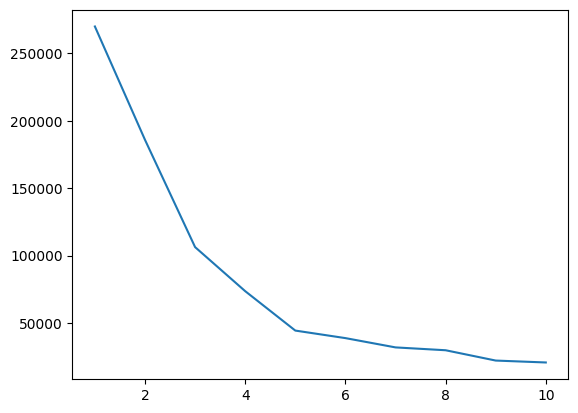

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(1,11),sse)

### Building the model

In [22]:
# K=5

In [23]:
kmeans_model_obeject = KMeans (n_clusters =5, init= 'k-means++') 
kmeans_model_obeject

KMeans(n_clusters=5)

In [24]:
kmeans_model = kmeans_model_obeject.fit(X)
kmeans_model

KMeans(n_clusters=5)

In [25]:
y_means = kmeans_model.fit_predict (X)

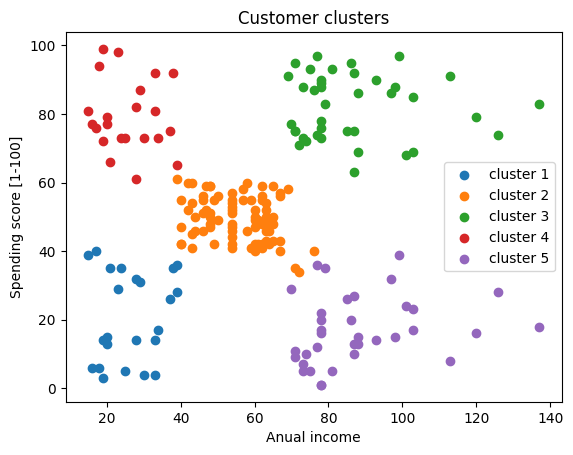

In [34]:
# Visualizing the cllusters
plt.scatter (X[y_means == 0,0], X[y_means ==0,1], label = "cluster 1")
plt.scatter (X[y_means == 1,0], X[y_means ==1,1], label = "cluster 2")
plt.scatter (X[y_means == 2,0], X[y_means ==2,1], label = "cluster 3")
plt.scatter (X[y_means == 3,0], X[y_means ==3,1], label = "cluster 4")
plt.scatter (X[y_means == 4,0], X[y_means ==4,1], label = "cluster 5")
plt.title("Customer clusters")
plt.xlabel("Anual income")
plt.ylabel("Spending score [1-100]")
plt.legend()
plt.show()

##### cluster 1 : Annual income, 10k-40k spending score 0-40
##### cluster 2 : Annual income, 40k-70k spending score 35-60
#### **cluster 3 : Annual income, 60k-140k spending score 60-100** [TARGET CLUSTER]
##### cluster 4 :Annual income, 10k-40k spending score 60-100
##### cluster 5 : Annual income, 50k-140k spending score 5-40

In [36]:
green_cluster = mall_dataset[y_means ==3]
green_cluster

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98
